In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("HR_comma_sep.csv")

# Display dataset info
print(df.info())

# Show first rows
print(df.head())

# Check retention count
print(df['left'].value_counts())

# Correlation between variables
print(df.corr(numeric_only=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86  

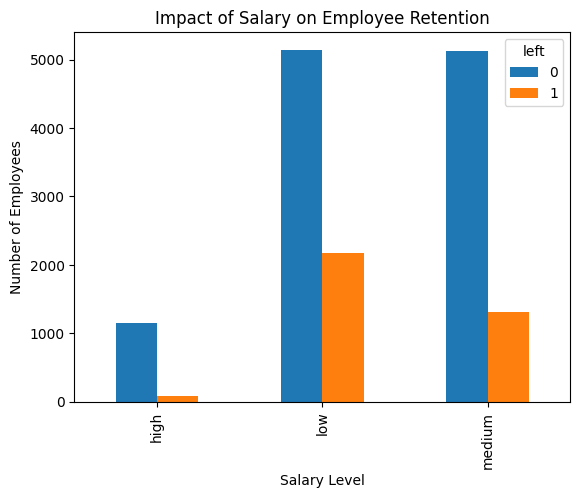

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("HR_comma_sep.csv")

salary_retention = pd.crosstab(df['salary'], df['left'])
salary_retention.plot(kind='bar')

plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.show()

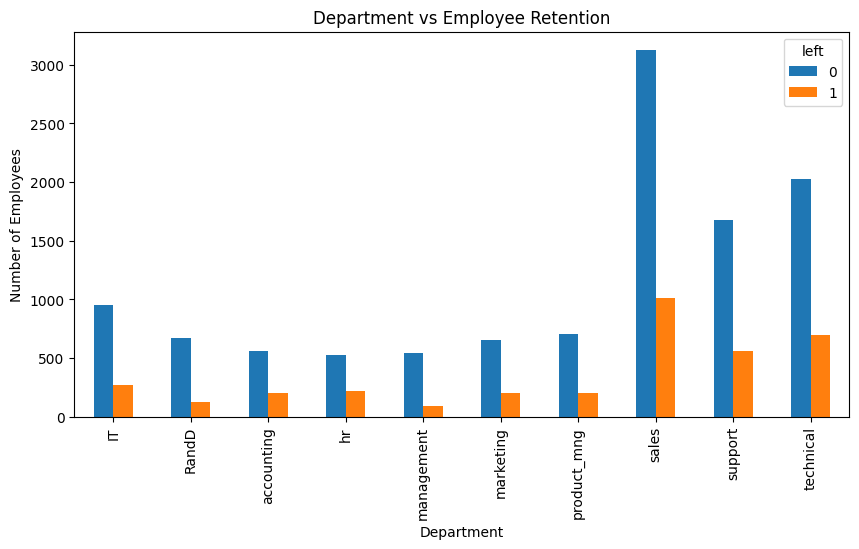

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("HR_comma_sep.csv")

dept_retention = pd.crosstab(df['Department'], df['left'])
dept_retention.plot(kind='bar', figsize=(10,5))

plt.title("Department vs Employee Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("HR_comma_sep.csv")

# Convert salary column into numbers
df = pd.get_dummies(df, columns=['salary'], drop_first=True)

# Selecting important variables
X = df[['satisfaction_level', 'average_montly_hours',
        'promotion_last_5years', 'salary_low', 'salary_medium']]

y = df['left']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [5]:
from sklearn.metrics import accuracy_score

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.762


In [7]:
import pandas as pd

# Load datasets
zoo = pd.read_csv("zoo-data.csv")
class_type = pd.read_csv("zoo-class-type.csv")

# Display datasets
print(zoo.head())
print(class_type.head())

# Drop animal name column (not useful for prediction)
zoo = zoo.drop(columns=['animal_name'])

# Features and target
X = zoo.drop(columns=['class_type'])
y = zoo['class_type']

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9523809523809523


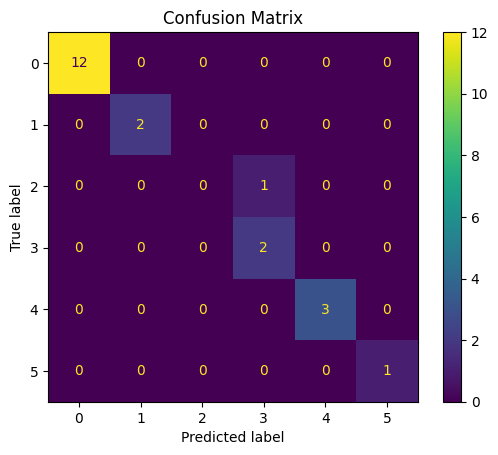

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title("Confusion Matrix")
plt.show()